In [ ]:
En este Notebook, estuve analizando las columnas, sus relaciones, y otras cosillas.
Elimine columnas que se repiten, 
Que no tienen variedad en sus datos, 
o que no aporta mucho para un modelo (como pagina de extraccion)
Tambien extraje la duracion basandome en el lenguje natural.


In [ ]:
lo que falta de Assignment 1 es:
- Wrangling /Cleaning
- Encoding
- algunos boxplots
- Quantile-based Flooring and Capping
- Trimming
- Log Transformation
- Use the unsupervised learning method of your choice (e.g: K-Means ) on the data you have for this assignment and discuss the outcomes.
- apply proper NLP techniques (data cleaning, stop word/punctuation removal, tokenizing, stemming/lemmatizing etc)r

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('courses.csv', lineterminator='\n')

**Delete unused columns or repeated**

In [ ]:
del df['Unnamed: 0']
del df['_id']
del df['page_no']
del df['position']
# these 3 columns, have the same values: cc_source_slug, cc_source_title, course_provider
del df['cc_source_slug']
del df['cc_source_title']
# The following have only one value each :  provider / catalog_listings
del df['cc_source'] 
del df['cc_source_section'] 



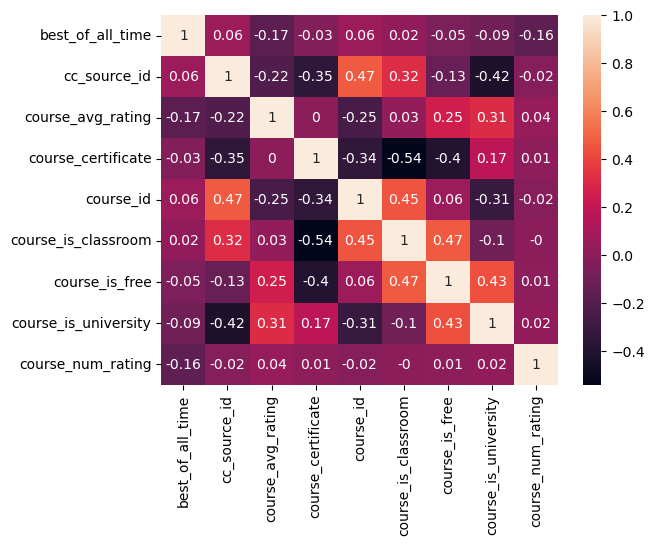

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

# The following Columns can be LabelEncoded
Lo mismo con course_provider, course_language, y course_institution, pero de esta ultima hay notas mas abajo

In [82]:
print(df['course_level'].unique())
print(df['course_type'].unique())


df.head(5)

[nan 'beginner' 'intermediate' 'advanced']
['course' 'microcredential' 'degree']


,best_of_all_time,cc_source_id,cc_source_section,course_avg_rating,course_certificate,course_id,course_institution,course_is_classroom,course_is_free,course_is_university,course_language,course_level,course_name,course_num_rating,course_provider,course_slug,course_subject,course_type,description,duration,total_reviews,duration_hours
0,True,178,catalog_listings,4.60976,False,146290,H-EDUCATE,True,True,False,English,NaN,ChatGPT Prompt Engineering Course,123,YouTube,youtube-chatgpt-prompt-engineering-course,ChatGPT,course,Syllabus: Introduction What will we cover? B...,Less than 1 hour of material,123 reviews,0.5
1,True,178,catalog_listings,4.67500,False,80239,Professor Dave Explains,True,True,False,English,NaN,Pharmacology,120,YouTube,youtube-pharmacology,Pharmacology,course,Learn the basics of Pharmacology to understand...,1-2 hours worth of material,120 reviews,1.5
2,False,178,catalog_listings,4.61538,False,47368,NPTEL,True,True,True,English,NaN,Organic Farming for Sustainable Agricultural p...,117,YouTube,youtube-organic-farming-for-sustainable-agricu...,Agriculture,course,The course is designed to train students on or...,20 hours worth of material,117 reviews,20
3,True,178,catalog_listings,4.57391,False,53095,Arizona State University,True,True,True,English,NaN,Supply Chain Management,115,YouTube,youtube-supply-chain-management,Supply Chain,course,"Learn about Supply Chain Management, Procureme...",1-2 hours worth of material,115 reviews,1.5
4,True,178,catalog_listings,4.71717,False,64206,Yale University,True,True,True,English,NaN,Fundamentals of Qualitative Research Methods,99,YouTube,youtube-fundamentals-of-qualitative-research-m...,Qualitative Research,course,Learn the fundamentals of Qualitative Research...,1-2 hours worth of material,99 reviews,1.5


### There are 2388 Unique Institutions.
Which is translated to 51 records per classification. 
Which is a pretty low number to use this colum for training on classification


In [86]:
print(df.shape)
print(df['course_institution'].unique().size)

(122555, 22)
2388


## Duration
This column could be treated with NLP to obtain the time.  
it contains 1950 types of duration description.  
REviewing manually the duration in hours per week is estimated for 3 hours per week.

The following function extracts the number from the text, and depending the context, it will assign a value

In [90]:
import re

def process_duration(duration):
    # durations_text have all the texts that are in the duration string 
    durations_texts = ['Less than  hour of material', 'hours worth of material',
                       'hour of material', 'nan',
                       'hours a week', 'week long',
                       'hour a week', 'weeks long', '']
    dur= str(duration).split(',')[0] #if it contains a comma, we ignore the rest, usually "weeks long" not affecting the time
    
    if '-' in dur:
        #In case there is a range, get the average
        dur = re.sub('[^0-9-]', '', dur)
        durs = dur.split('-')
        durs = [0 if x == '' else int(x) for x in durs]
        t = sum(durs)/2
        return t

    if 'Less than' in dur:
        t = 0.5
    elif ( 'hours worth of material' in dur or 'hours worth of material' in dur
                    or 'hour of material' in dur or 'hour a week' in dur
                    or 'hours a week' in dur):
        t = re.sub('[^0-9-]', '', dur)
    elif (dur == 'week long' or dur ==  'weeks long'):
        # extract the number and multiply it by 3
        t = re.sub('[^0-9-]', '', dur)
        t = int(t)*3
    else:
        t = re.sub('[^0-9-]', '', dur)
    return t

df['duration_hours']   = df['duration'].apply(process_duration)
df[['duration','duration_hours']].head(10)

In [95]:
df.head()

,best_of_all_time,cc_source_id,course_avg_rating,course_certificate,course_id,course_institution,course_is_classroom,course_is_free,course_is_university,course_language,course_level,course_name,course_num_rating,course_provider,course_slug,course_subject,course_type,description,duration,total_reviews,duration_hours
0,True,178,4.60976,False,146290,H-EDUCATE,True,True,False,English,NaN,ChatGPT Prompt Engineering Course,123,YouTube,youtube-chatgpt-prompt-engineering-course,ChatGPT,course,Syllabus: Introduction What will we cover? B...,Less than 1 hour of material,123 reviews,0.5
1,True,178,4.67500,False,80239,Professor Dave Explains,True,True,False,English,NaN,Pharmacology,120,YouTube,youtube-pharmacology,Pharmacology,course,Learn the basics of Pharmacology to understand...,1-2 hours worth of material,120 reviews,1.5
2,False,178,4.61538,False,47368,NPTEL,True,True,True,English,NaN,Organic Farming for Sustainable Agricultural p...,117,YouTube,youtube-organic-farming-for-sustainable-agricu...,Agriculture,course,The course is designed to train students on or...,20 hours worth of material,117 reviews,20
3,True,178,4.57391,False,53095,Arizona State University,True,True,True,English,NaN,Supply Chain Management,115,YouTube,youtube-supply-chain-management,Supply Chain,course,"Learn about Supply Chain Management, Procureme...",1-2 hours worth of material,115 reviews,1.5
4,True,178,4.71717,False,64206,Yale University,True,True,True,English,NaN,Fundamentals of Qualitative Research Methods,99,YouTube,youtube-fundamentals-of-qualitative-research-m...,Qualitative Research,course,Learn the fundamentals of Qualitative Research...,1-2 hours worth of material,99 reviews,1.5


In [96]:

del df['duration']

#
## Notas extras
Estas columnas estan relacionadas, podemos uasr cc_source para entrenar el modelo, o borrarla, y usar despues un LabelEncoder en course_provider  
**These two columns are related, 
 We can use cc_source_id to train our models, as it is already a number. 
Or delete the column and create a LabelEncoder**

In [33]:

print(df['cc_source_id'].unique())
print(df['course_provider'].unique())

[178 103   1 167 171 166   8 113 205 186 174 162 173 161 206 196 216 169
 109 116 183  16 172 164 195 159 200 212   3 168 199 156 188 115 148 170
 208 106 177 201 211 185 197 175 124   9 117 191 210 179 184 129 147 204
 203 182 176 104 207 134  14 140 141 192 128 146 202 194  13 163 123 111
 131 209  12 189 180 181 198 190 187 215 214]
['YouTube' 'Udemy' 'Coursera' 'LinkedIn Learning' 'Skillshare'
 'Pluralsight' 'edX' 'FutureLearn' 'Study.com' 'AWS Skill Builder'
 'Domestika' 'Swayam' 'CreativeLive' 'Independent' 'Craftsy' 'OpenLearn'
 'Google Cloud Skills Boost' 'The Great Courses Plus' 'Miríadax'
 'France Université Numerique' 'Microsoft Learn' 'Canvas Network'
 'freeCodeCamp' 'ThaiMOOC' 'OpenWHO' 'DataCamp' 'A Cloud Guru'
 'egghead.io' 'Udacity' 'Codecademy' 'Cybrary' 'Treehouse' 'Trailhead'
 'openSAP' 'Kadenze' 'MasterClass' 'FGV Educação Executiva' 'iversity'
 'Edureka' 'Laracasts' 'Frontend Masters' 'Qwiklabs' 'Saylor Academy'
 'MIT OpenCourseWare' 'gacco' 'openHPI' 'Rwaq (رواق)'